### 피부색 추출 알고리즘 병합
    
    최초 작성일 : 20/02/19
    작성자 : 양희승
    
    작성내용 : 피부색 추출 시 모든 과정 통합
               
               원본사진
               (white balace test)
               -> 화이트밸런스 조정 
               
               (face_detection_test)
               -> 사진 리사이징
               -> 얼굴 인식
               -> 크롭
               -> 볼 인식
               -> 볼 두개 이미지 평균 이미지 추출
               -> 평균색으로 이미지 변환
               
               (color_convert_test)
               -> 평균색 GBR - RGB 변환
               -> RGB - HSV 변환
               
               (조예슬씨 코드)
               -> HSV 분석
               -> 웜 쿨 구분 후 
               -> 반환 값
               
               
               -> 결과값 저장
               -> 입력값???

In [22]:
import cv2 as cv
import numpy as np
import colour
import utils
import matplotlib.pyplot as plt

In [23]:
def white_balance(img, file_name) :   
    result = cv.cvtColor(img, cv.COLOR_BGR2LAB)
    avg_a = np.average(result[:, :, 1])
    avg_b = np.average(result[:, :, 2])
    result[:, :, 1] = result[:, :, 1] - ((avg_a - 128) * (result[:, :, 0] / 255.0) * 1.1)
    result[:, :, 2] = result[:, :, 2] - ((avg_b - 128) * (result[:, :, 0] / 255.0) * 1.1)
    result = cv.cvtColor(result, cv.COLOR_LAB2BGR)
    wb_img = result
    cv.imwrite("img/"+file_name+"_1.jpg", wb_img)
    
    return wb_img

In [45]:
def face_detection(wb_img, file_name) :
    origin_img = wb_img


    # opencv의 얼굴인식 이용, 눈 인식 이용
    faceCascade = cv.CascadeClassifier('data/haarcascade_frontface.xml') 
    faceCascade_eye = cv.CascadeClassifier('data/haarcascade_eye.xml') 


    # Gray 컬러 변환
    gray = cv.cvtColor(origin_img, cv.COLOR_BGR2GRAY) 
    faces = faceCascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30) ) 


    face_cropped = None
    cheek_cropped = None


    # face_detection
    if len(faces) > 1 :
        print("한 사람만 찍힌 사진을 올려주세요")
    elif len(faces) == 1 :
        for (x, y, w, h) in faces: 
            cv.rectangle(origin_img, (x, y), (x+w, y+h), (0, 255, 0), 2) 
        #     cv.imshow("Face", origin_img) 
            cv.imwrite("img/"+file_name+"_2.jpg", origin_img)
            face_cropped = origin_img[y:y + h, x:x + w]
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = origin_img[y:y+h, x:x+w]
    elif len(faces) == 0 :
        print("정면이거나 정상적인 사진을 올려주세요")
    else :
        print("에러")

    cv.imwrite("img/"+file_name+"_3.jpg", face_cropped)
    gray = cv.cvtColor(face_cropped, cv.COLOR_BGR2GRAY) 
    eyes = faceCascade_eye.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30) ) 

    
    
    temp_img = face_cropped  
    # cheek_detection
    for i in range(len(eyes)): 
        x, y, w, h = eyes[i]
        if i == 0 :
            cheek_cropped1 = temp_img[y+40:y+40+15, x-10:x+20]
#             cv.rectangle(face_cropped, (x-10, y+40), (x+20, y+40+15), (0, 255, 0), 2) 
            
        elif i == 1 :
            cheek_cropped2 = temp_img[y+40:y+40+15, x+10:x+40]
#             cv.rectangle(face_cropped, (x+10, y+40), (x+40, y+40+15), (0, 255, 0), 2) 
#             cv.imwrite("img/"+file_name+"_4.jpg", face_cropped)            
            final = np.hstack((cheek_cropped1, cheek_cropped2))    
##################################################################

    for i in range(len(eyes)): 
        x, y, w, h = eyes[i]        
        if i == 0 :
            cv.rectangle(face_cropped, (x-10, y+40), (x+20, y+40+15), (0, 255, 0), 2)             
        elif i == 1 :
            cv.rectangle(face_cropped, (x+10, y+40), (x+40, y+40+15), (0, 255, 0), 2) 
            cv.imwrite("img/"+file_name+"_4.jpg", face_cropped)




#     cv.imshow("Face", final) 
    cv.imwrite("img/"+file_name+"_5.jpg", final)
    cv.waitKey(0) 
    cv.destroyAllWindows() 
    cv.waitKey(0)
    
    return final

In [53]:
def color_convert(cheek, file_name) :
    img = cheek
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    
    sum = 0
    R = []
    G = []
    B = []
    for i in img :
        for j in i :
            R.append(j[0])
            G.append(j[1])
            B.append(j[2])

    R_sum = 0
    G_sum = 0
    B_sum = 0

    # 각 R, G, B의 합계 구하기
    for i in range(len(R)) :
        R_sum += R[i]
        G_sum += G[i]
        B_sum += B[i]

    R_avg = int(round((R_sum / len(R)), 0)) # R값 평균
    G_avg = int(round((G_sum / len(G)), 0))  # R값 평균
    B_avg = int(round((B_sum / len(B)), 0))  # R값 평균
    RGB_color = [R_avg, G_avg, B_avg]
    
    
    # 평균 색만 그래프 그리기 위함 img_avg
    img_avg = img

    for i in img_avg :
        for j in i :
            j[0] = R_avg
            j[1] = G_avg
            j[2] = B_avg

    # 기존        
    plt.imshow(img)
    plt.show()

    # 평균색
    plt.imshow(img_avg)
    plt.show()
    bgr_img_avg = cv.cvtColor(img_avg, cv.COLOR_RGB2BGR)

    # 저장
    cv.imwrite("img/"+file_name+"_6.jpg", bgr_img_avg)
    
    
    # 변환식
    arr_RGB_color = np.array(RGB_color)
    float_arr_RGB_color = arr_RGB_color / 255
    float_tp_RGB_color = tuple(float_arr_RGB_color)
    HSV_color = colour.RGB_to_HSV(float_tp_RGB_color)
    HSV_color2 = np.array([round(HSV_color[0]*359, 3), round(HSV_color[1] * 100, 3), round(HSV_color[2] * 100, 3)])
#     print("HSV 값 : ", HSV_color2)
    HSV_color2 = list(HSV_color2)
    HSV_color2[0] = round(HSV_color2[0], 2)
    HSV_color2[1] = round(HSV_color2[1], 2)
    HSV_color2[2] = round(HSV_color2[2], 2)
    return HSV_color2


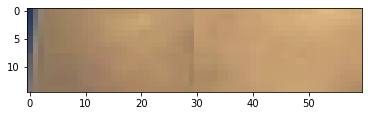

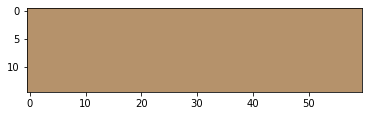

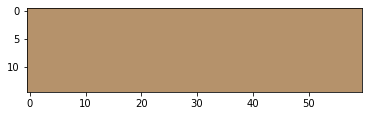

[31.530000000000001, 40.880000000000003, 70.980000000000004]


In [54]:
file_name = "origin"
img = cv.imread("img/"+file_name+".jpg")
wb_img = white_balance(img, file_name)
cheek = face_detection(wb_img, file_name)
final = color_convert(cheek, file_name)

print(final)